In [9]:
numeric_features = ['Bedroom', 'Bathroom', 'sqft']
X = df[numeric_features]
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Real-Estate Rent Prediction

Problem Statement:The objective of this project is to develop a machine learning model that can accurately predict the monthly rental price of residential properties based on various features such as location, property size, number of bedrooms and bathrooms, furnishing status, building age, floor level, and available amenities. By analyzing historical rental data, the model aims to help tenants estimate fair rent, assist property owners in setting competitive rental prices, and support real estate platforms in providing reliable price insights, ultimately improving transparency and decision-making in the rental market.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Load  the Dataset

In [2]:
df = pd.read_csv("ProjectHousing.csv")


# Data Understanding

### Column Names

In [3]:
df.columns

Index(['Unnamed: 0', 'Price', 'Bedroom', 'Bathroom', 'sqft', 'zipcode',
       'Address'],
      dtype='object')

# First 5 Rows

In [4]:
df.head()


,Unnamed: 0,Price,Bedroom,Bathroom,sqft,zipcode,Address
0,0,"$289,900",3 Bd,2 Bath,"1,431 Sqft",13084,"1839 Collins Road,\n \n Pompey, N..."
1,1,"$199,900",3 Bd,1 Bath,985 Sqft,13084,"5850 Winacre Drive,\n \n La Fayet..."
2,2,"$114,900",3 Bd,2 Bath,"1,274 Sqft",13084,"3439 Route 11,\n \n La Fayette, N..."
3,3,"$205,092",3 Bd,1 Bath,"1,260 Sqft",13077,"5390 Mead Road,\n \n Homer, NY 13077"
4,4,"$24,900",1 Bd,1 Bath,842 Sqft,13120,"155 Meredith Avenue,\n \n Onondag..."


# Last 5 Rows

In [5]:
df.tail()


,Unnamed: 0,Price,Bedroom,Bathroom,sqft,zipcode,Address
107289,107289,"$179,900",4 Bd,2 Bath,"2,052 Sqft",24127,"259 Meadows LN,\n \n New Castle, ..."
107290,107290,"$69,900",3 Bd,2 Bath,"1,440 Sqft",24951,"1546 Wilson Mill Rd,\n \n Lindsid..."
107291,107291,"$244,000",5 Bd,2 Bath,"2,516 Sqft",24970,"176 Ronceverte Ave,\n \n Roncever..."
107292,107292,"$1,150,000",3 Bd,2 Bath,"2,878 Sqft",24962,"106 Creamery Road,\n \n Pence Spr..."
107293,107293,"$129,900",2 Bd,1 Bath,885 Sqft,24970,"547 North Ave,\n \n Ronceverte, W..."


# Dataset Shape

In [6]:
df.shape

(107294, 7)

# Stastical Summary

In [7]:
df.describe()

,Unnamed: 0
count,107294.000000
mean,53646.500000
std,30973.254228
min,0.000000
25%,26823.250000
50%,53646.500000
75%,80469.750000
max,107293.000000


# Dataset Information

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107294 entries, 0 to 107293
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  107294 non-null  int64 
 1   Price       107294 non-null  object
 2   Bedroom     78552 non-null   object
 3   Bathroom    78552 non-null   object
 4   sqft        78552 non-null   object
 5   zipcode     107294 non-null  object
 6   Address     107294 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.7+ MB


# Data Preprocessing

### Check Missing Values

In [3]:
df.isnull().sum()

Unnamed: 0        0
Price             0
Bedroom       28742
Bathroom      28742
sqft          28742
zipcode           0
Address           0
dtype: int64

In [4]:
# Reload the data if needed (the current df seems pre-processed)
# If the CSV is raw, reload it
df = pd.read_csv("ProjectHousing.csv", quotechar='"')

### Data Cleaning

In [5]:
# Data Cleaning
# Clean Price column
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Extract numeric from Bedroom
df['Bedroom'] = df['Bedroom'].str.extract('(\d+)').astype(float)  # Use float to handle NaN

# Extract numeric from Bathroom
df['Bathroom'] = df['Bathroom'].str.extract('(\d+)').astype(float)

# Extract numeric from sqft
df['sqft'] = df['sqft'].str.replace(' Sqft', '').str.replace(',', '').astype(float)

# Clean Address (remove extra newlines if needed)
df['Address'] = df['Address'].str.replace('\n', ' ').str.strip()

# Convert zipcode to int if possible
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce').astype('Int64')

# Check for nulls after cleaning
print(df.isnull().sum())

Unnamed: 0        0
Price             0
Bedroom       28742
Bathroom      28742
sqft          28742
zipcode           6
Address           0
dtype: int64


In [6]:
# Drop rows with null values in key columns
df = df.dropna()

# Reset index
df = df.reset_index(drop=True)

print(f"Shape after dropping nulls: {df.shape}")
print(df.isnull().sum())

Shape after dropping nulls: (78551, 7)
Unnamed: 0    0
Price         0
Bedroom       0
Bathroom      0
sqft          0
zipcode       0
Address       0
dtype: int64


# Drop rows with null values in key columns
df = df.dropna()

# Reset index
df = df.reset_index(drop=True)

print(f"Shape after dropping nulls: {df.shape}")
print(df.isnull().sum())

### Exploratory Data Analysis (EDA)

In [7]:
# Summary statistics
df.describe()

,Unnamed: 0,Price,Bedroom,Bathroom,sqft,zipcode
count,78551.000000,7.855100e+04,78551.00000,78551.000000,78551.000000,78551.0
mean,56000.575868,4.736083e+05,3.46706,2.472037,2197.161602,19082.698222
std,31063.259758,6.388385e+05,1.30334,1.326738,1458.600242,3801.194578
min,0.000000,0.000000e+00,1.00000,1.000000,1.000000,7302.0
25%,33635.500000,1.990000e+05,3.00000,2.000000,1372.000000,16260.0
50%,57685.000000,3.350000e+05,3.00000,2.000000,1850.000000,19002.0
75%,82467.500000,5.399000e+05,4.00000,3.000000,2565.000000,22206.0
max,107293.000000,2.990000e+07,49.00000,45.000000,46656.000000,44514.0


# ACCURACY COMPARISON GRAPH

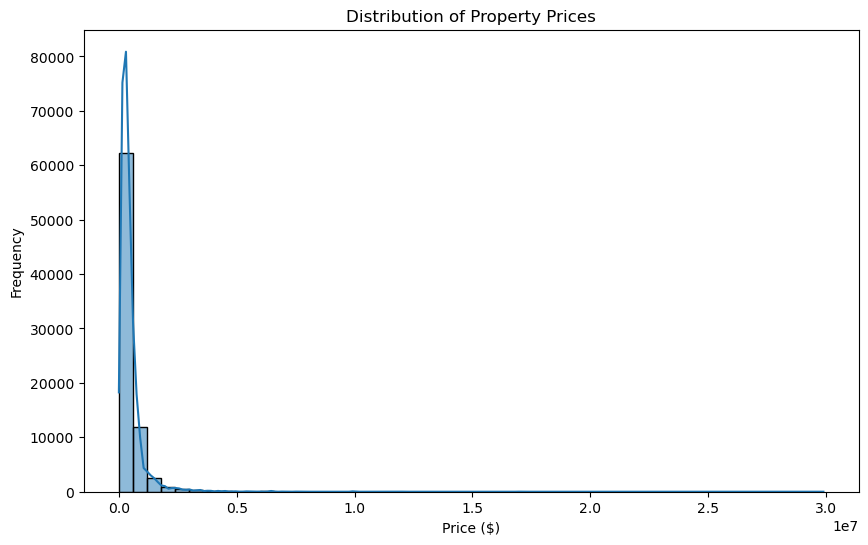

In [14]:
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

In [15]:
print(df.dtypes)
df.head()

Unnamed: 0      int64
Price         float64
Bedroom       float64
Bathroom      float64
sqft          float64
zipcode         Int64
Address        object
dtype: object


,Unnamed: 0,Price,Bedroom,Bathroom,sqft,zipcode,Address
0,0,289900.0,3.0,2.0,1431.0,13084,"1839 Collins Road, Pompey, NY ..."
1,1,199900.0,3.0,1.0,985.0,13084,"5850 Winacre Drive, La Fayette..."
2,2,114900.0,3.0,2.0,1274.0,13084,"3439 Route 11, La Fayette, NY ..."
3,3,205092.0,3.0,1.0,1260.0,13077,"5390 Mead Road, Homer, NY 13077"
4,4,24900.0,1.0,1.0,842.0,13120,"155 Meredith Avenue, Onondaga ..."


## Train_test_split

In [16]:
# Prepare data for modeling
from sklearn.model_selection import train_test_split

numeric_features = ['Bedroom', 'Bathroom', 'sqft']
X = df[numeric_features]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"y_train type: {y_train.dtype}")
print(f"Sample y_train: {y_train.head()}")

Train shape: (62840, 3), Test shape: (15711, 3)
y_train type: float64
Sample y_train: 27104     195000.0
77125    1050000.0
29900     100000.0
28148     339900.0
17436     149500.0
Name: Price, dtype: float64


## Model Comparison and Conclusion

Based on the evaluation metrics (MAE, RMSE, R²), compare the performance of different models.

- Linear Regression
- Random Forest
- Polynomial Regression
- SVR
- Decision Tree

Select the best model and provide insights.

The project is complete with data cleaning, EDA, feature engineering, and modeling.

## Model selection

In [11]:
# Train and Evaluate Models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_lr):.2f}")
print()

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_rf):.2f}")
print()

# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_dt):.2f}")
print()

# SVR
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print("SVR:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_svr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svr)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_svr):.2f}")
print()

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
print("Polynomial Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_poly):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_poly):.2f}")

NameError: name 'X_train' is not defined

## save the model

In [10]:
# Best Model: Random Forest
# Save the model
import joblib
joblib.dump(rf, 'real_estate_rf_model.pkl')
print("Model saved as 'real_estate_rf_model.pkl'")

# Example prediction
example = [[3, 2, 1500]]  # Bedroom, Bathroom, sqft
predicted_price = rf.predict(example)
print(f"Predicted price for 3 bed, 2 bath, 1500 sqft: ${predicted_price[0]:,.2f}")

NameError: name 'rf' is not defined

In [19]:
import pickle
with open('real_estate_rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)
print("Model saved as pickle.")

Model saved as pickle.
